# Classification of driving behavior using acc. data

This notebooks uses the driving behavior dataset from Kaggle and aims to classify the driver's driving based on accelerometer data.

## Libraries

In [8]:
from matplotlib import pyplot as plt


import pandas as pd
import numpy as np

## Preprocessing

In [3]:
# loading data
df_1 = pd.read_csv('datasets/test_motion_data.csv')
df_2 = pd.read_csv('datasets/train_motion_data.csv')

# merging
df = pd.concat([df_1, df_2], axis=0)

df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [4]:
# showing info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6728 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       6728 non-null   float64
 1   AccY       6728 non-null   float64
 2   AccZ       6728 non-null   float64
 3   GyroX      6728 non-null   float64
 4   GyroY      6728 non-null   float64
 5   GyroZ      6728 non-null   float64
 6   Class      6728 non-null   object 
 7   Timestamp  6728 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 473.1+ KB


In [5]:
# basic statistics
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6.728000e+03
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564,2.316251e+06
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710,1.376747e+06
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468,8.189220e+05
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,8.199088e+05
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,3.581780e+06
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,3.582777e+06
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500,3.583791e+06


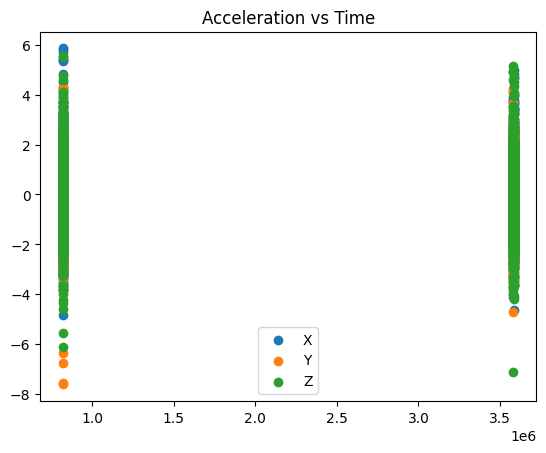

In [41]:
# plot to observe range of data
plt.scatter(df['Timestamp'], df['AccX'])
plt.scatter(df['Timestamp'], df['AccY'])
plt.scatter(df['Timestamp'], df['AccZ'])

#plt.xlim([500000,4000000])
plt.legend(['X', 'Y', 'Z'])
plt.title('Acceleration vs Time')
plt.show()

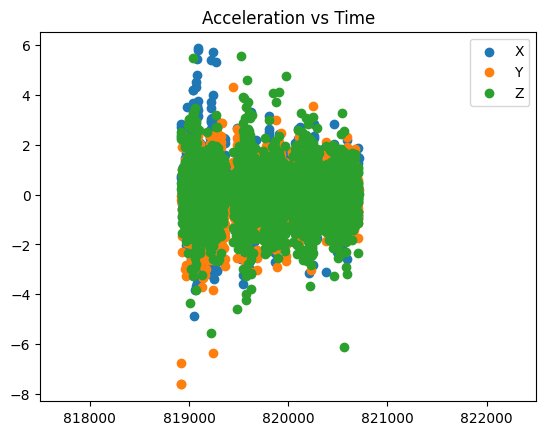

In [40]:
# we analize from 0.9s to 3.5s
plt.scatter(df['Timestamp'], df['AccX'])
plt.scatter(df['Timestamp'], df['AccY'])
plt.scatter(df['Timestamp'], df['AccZ'])

plt.xlim([817500,822500])
#plt.ylim([-0.5,1.5])
plt.legend(['X', 'Y', 'Z'])
plt.title('Acceleration vs Time')
plt.show()

In [42]:
# constraining the data
df_1.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.106234,-0.131791,0.045011,0.003192,0.001452,0.011472,819830.000324
std,0.968089,0.904398,0.997625,0.066636,0.120963,0.113535,525.760733
min,-4.854163,-7.621754,-6.106982,-0.514959,-1.309466,-0.976315,818922.000000
25%,-0.408916,-0.625868,-0.461438,-0.024435,-0.045739,-0.027031,819338.000000
50%,0.051892,-0.096929,0.054154,0.001222,-0.000993,0.002291,819832.500000
75%,0.579148,0.393118,0.575119,0.028100,0.043601,0.035888,820292.250000
max,5.864980,4.308813,5.564037,1.490511,1.707598,0.719447,820709.000000


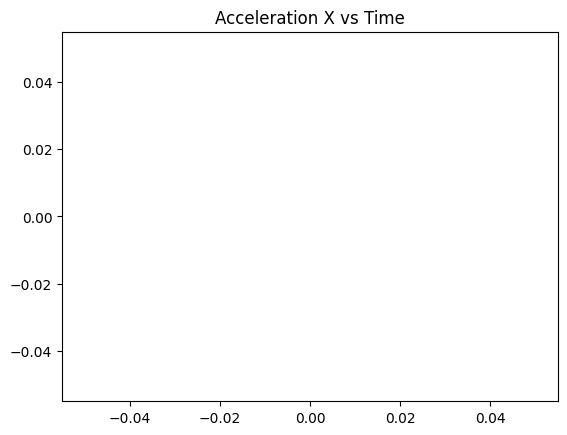

In [29]:
# plot of acc X
plt.plot(df_cons['Timestamp'], df_cons['AccX'])


plt.title('Acceleration X vs Time')
plt.show()

## Enriching dataset

In [11]:
# acceleration norm
df['Acc'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)

#df = df.reindex(sorted(df.columns), axis=1)

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
0,0.911801,0.758194,-0.217791,0.457263,AGGRESSIVE,0.000000,0.000000,0.000000,818922
1,0.707588,0.667560,-0.038610,0.231416,AGGRESSIVE,-0.054367,-0.007712,0.225257,818923
2,8.405834,2.724449,-7.584121,2.390926,AGGRESSIVE,0.023824,0.013668,-0.038026,818923
3,8.361843,2.330950,-7.621754,2.529024,AGGRESSIVE,0.056810,-0.180587,-0.052076,818924
4,7.661206,2.847215,-6.755621,2.224640,AGGRESSIVE,-0.031765,-0.035201,0.035277,818924
...,...,...,...,...,...,...,...,...,...
3639,2.785035,0.915688,-2.017489,1.687505,SLOW,0.450360,0.384845,-1.236468,3583789
3640,2.141833,-1.934203,0.914925,-0.096013,SLOW,0.321468,0.649350,-0.477162,3583790
3641,1.181378,-0.222845,0.747304,-0.887430,SLOW,0.361174,-0.406836,0.054291,3583790
3642,0.531175,-0.349423,0.067261,0.394368,SLOW,-0.132405,0.020159,-0.004963,3583791


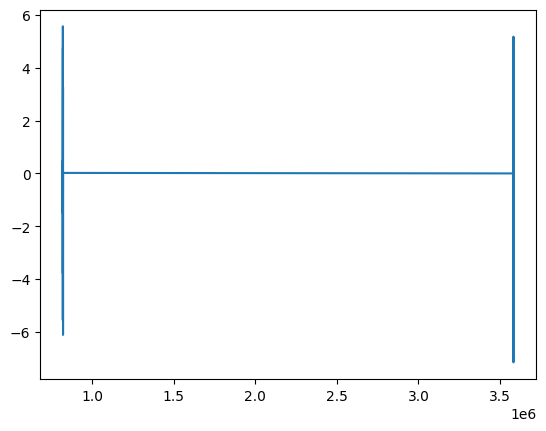

In [16]:
plt.plot(df['Timestamp'], df['AccZ'])